# Imports && Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
total_categories=49
title_size=24
label_size=20
text_size=18
tick_size=16
cmap=cm.Blues(np.linspace(0,1.,21))

# Load/fix the data

In [4]:
directory='./data/pkl/'
file_name='user_data_backup_3.pkl'

In [5]:
df=pd.read_pickle(directory+file_name)

In [6]:
id_category={}
id_category_filename='./data/id_category.txt'
file_handle=open(id_category_filename)
line=' '
while line:
    try:
        line=file_handle.readline().split('\t')
        key=line[0]
        value=line[1].replace('\n', '')
        id_category[key]=value
    except:
        break

In [21]:
df.head()

,device_id,0,1,2,3,4,5,6,7,8,...,39,40,41,42,43,44,45,46,47,48
0,0,0,1,2,3,4,5,6,7,8,...,39,40,41,42,43,44,45,46,47,48
1,34106,31927,0,39448,0,0,0,0,39208,0,...,0,0,0,0,0,0,0,0,0,0
2,36750,497671,88562935,3774281,0,0,0,1301912,402810,128171,...,0,0,0,0,0,0,0,0,0,0
3,38608,26319,6506843,0,0,0,0,2794364,548974,0,...,0,0,0,0,0,28239620,0,0,0,0
4,39175,0,17755594,5680644,38613,0,3300218,19384,39749,0,...,0,831555,0,0,0,0,0,0,0,0


# Plot most popular apps by play time

In [22]:
playtime_list=[]
for i in range(1,total_categories):
    playtime_list.append(df[str(i)].sum())

In [23]:
keys=[int(key) for key in id_category.keys()]
keys.sort()

In [24]:
print playtime_list

[137315436322, 2711720305, 1507571259, 361727217, 6895099604, 31840773998, 8237177177, 1919100506, 28421509103, 2246611424, 11056323871, 1816008128, 5893321814, 833885088, 1415053145, 100621029656, 7931946115, 5360345475, 23117107491, 25520774809, 8474280, 2806491, 30359138, 32094436, 19136858303, 1974070788, 559058841, 7179284848, 1467510330, 30, 31, 2607308915, 1092133346, 1711313421, 5081375957, 1945270148, 23991385, 638636, 52326083, 10250567298, 5043562496, 2189548328, 43, 6692530892, 595696805, 5161225316, 1625987508, 48]


Comics
Lifestyle
Photography
Shopping
Personalization
Tools
Cards & Casino
6


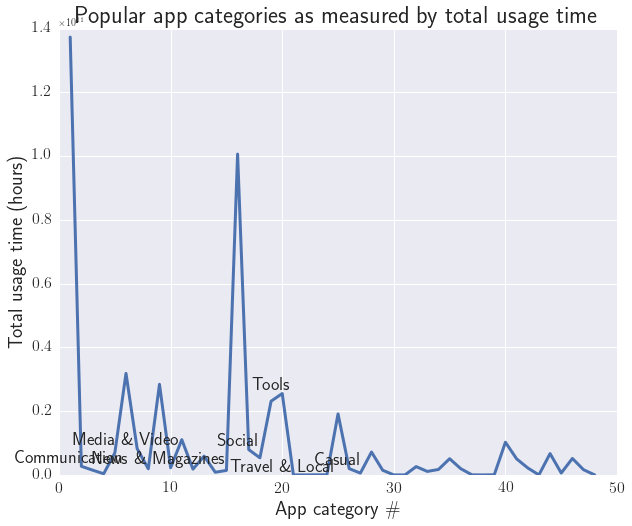

In [25]:
fig=plt.figure()

plt.plot(keys, playtime_list, lw=3)

peaks=[1,6,9,16,19,20,25]
for peak in peaks:
    print id_category[str(peak)]
    plt.text(peak, playtime_list[peak], id_category[str(peak+1)].replace('&','\&'), size=text_size, ha='center', va='bottom')


plt.tick_params(axis='both', which='major', labelsize=tick_size)
    
plt.title('Popular app categories as measured by total usage time', size=title_size)
plt.xlabel('App category \#', size=label_size)
plt.ylabel('Total usage time (hours)', size=label_size)
fig.set_size_inches(10,8)

#################################################
# Arrows
ax = plt.axes()

# Media and news
#ax.arrow(peaks[1], playtime_list[peak], peaks[1], 3*playtime_list[peak], head_width=0.05, head_length=0.1, fc='k', ec='k', lw=3)

print peaks[1]

plt.show()

# Normalize features

In [9]:
for i in range(total_categories):
    mean=df[str(i)].mean()
    std=df[str(i)].std()
    df[str(i)]=df[str(i)].map(lambda x: (x-mean)/std)

In [10]:
X=df.values[1:,:]

# Get feature correlations

In [13]:
correlation_matrix=np.zeros((total_categories, total_categories))

In [14]:
for i in range(total_categories):
    for j in range(i):
        correlation=0
        for k in range(X.shape[0]):
            correlation=correlation+X[k,i]*X[k,j]
        correlation=correlation/X.shape[0]
        correlation_matrix[i,j]=correlation
        print i,j,correlation_matrix[i,j]

1 0 0.00118760980683
2 0 -0.0067543931638
2 1 0.096533412529
3 0 -0.00227393811741
3 1 0.0118651829835
3 2 0.0122993845527
4 0 -0.00263485155001
4 1 0.00332356583895
4 2 -0.0062858191046
4 3 -0.00118420989643
5 0 0.00156318505513
5 1 0.0421430039713
5 2 0.0382914802302
5 3 0.00356483953401
5 4 0.002609306884
6 0 0.000501206904305
6 1 0.172170370507
6 2 0.0135718957996
6 3 -0.0104732025284
6 4 0.0150459528141
6 5 -0.00379108909564
7 0 -0.00615872574512
7 1 0.0943097323217
7 2 0.0202639808762
7 3 -0.00310344537871
7 4 -0.000626357197176
7 5 0.000697412458495
7 6 0.0896275198568
8 0 -0.00260927713888
8 1 0.140058481335
8 2 0.0250381985114
8 3 -0.000428483113866
8 4 -0.00160996914311
8 5 0.0137763065696
8 6 0.0711512760235
8 7 0.0387305954642
9 0 -0.00611111239428
9 1 0.177677040376
9 2 0.0670706687747
9 3 -0.00142436999839
9 4 -0.00571524600049
9 5 0.00969632775274
9 6 0.0809196455295
9 7 0.0498816290744
9 8 0.109716047678
10 0 -0.0101238326796
10 1 0.0712590454983
10 2 0.109350040566
10 

In [38]:
print correlation_matrix

[[  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -1.00831772e-02   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -1.47207848e-02   1.01042955e-01   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [ -4.07625477e-03   7.44147943e-02   1.93838965e-02 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  2.52072052e-02   3.47274791e-02  -2.04481913e-02 ...,  -1.98497762e-02
    0.00000000e+00   0.00000000e+00]
 [ -1.03585519e-06  -1.38613203e-05  -6.86934703e-06 ...,  -2.97467345e-06
   -2.95582469e-06   0.00000000e+00]]


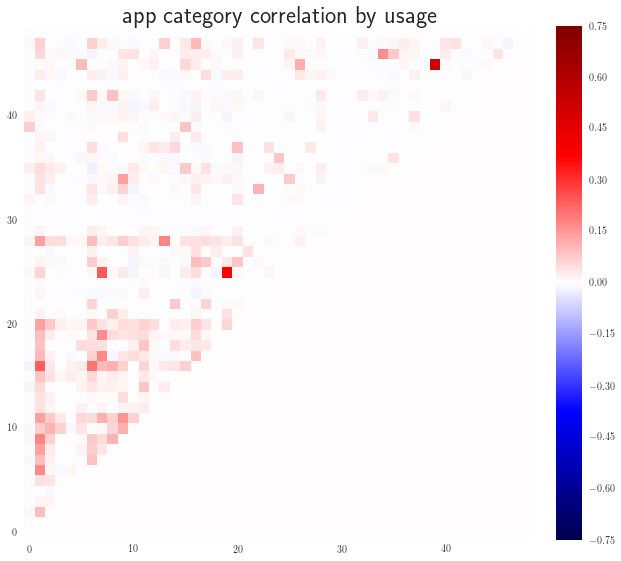

In [35]:
fig=plt.figure()
plt.imshow(correlation_matrix, origin='lower', interpolation='None', vmin=-.75, vmax=.75,\
          cmap='seismic')
plt.colorbar(fraction=0.046, pad=0.04)
plt.grid()
plt.title('app category correlation by usage', size=title_size)

fig.set_size_inches(10,10)

# PCA

In [14]:
X=df.values[1:,1:]

In [15]:
pca_model=PCA(n_components=49)
pca_model.fit(X)
X_pca=pca_model.transform(X)

In [16]:
sum(pca_model.explained_variance_ratio_[:35])

0.86482259061786571

In [17]:
X_pca.shape

(1357, 49)

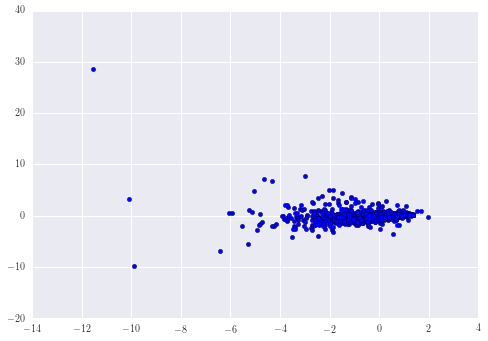

In [18]:
plt.scatter(X_pca[:,0], X_pca[:,2])
plt.show()

# Visualization

In [17]:
print X.shape

(3495, 49)


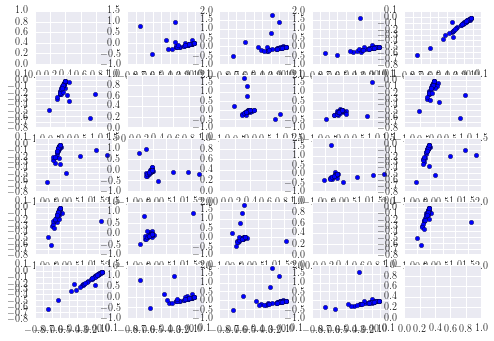

In [16]:
num_plots=len(peaks[0:5])**2
sub_peaks=peaks[0:5]
num=770

f, axarr = plt.subplots(len(sub_peaks), len(sub_peaks))



plot_num=0
for i in range(0, len(sub_peaks)):
    for j in range(0, len(sub_peaks)):
        if i != j:
            axarr[i,j].scatter(X[i,:], X[j,:])
            plot_num+=1
        
f.subplots_adjust(hspace=0.2)

plt.show()

#for i in range(len(peaks)):
#    for j in range(i):
#        ind1=peaks[i]
#        ind2=peaks[j]
#        
#        
#        plt.subplot(num+j+7*i)
#        plt.scatter(X[ind1], X[ind2])
#        
#        plt.xlim()
#        plt.show()

# Run k-means

In [98]:
axes=[0,5,8,15]

In [29]:
for i in range(len(axes)):
    print axes[i], id_category[str(i+2)]

NameError: name 'axes' is not defined

In [7]:
X_limited=X[:,axes]

NameError: name 'X' is not defined

In [19]:
model=KMeans(n_clusters=5)
model.fit(X[1:])

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [20]:
cluster_centers=model.cluster_centers_
print cluster_centers

[[ 0.39228502  0.60748606  0.59191263  0.47404567  0.40193105  0.54272516
   0.39345977  0.56314164  0.66518864  0.60368253  0.50301597  0.40547881
   0.33600675  0.54942887  0.28566105  0.64140547  0.36718585  0.63932644
   0.39344073  0.43632229  0.56757046  0.64424007  0.5719721   0.56406021
   0.42412246  0.65769976  0.40203471  0.45439684  0.43406933  0.63424495
   0.53357928  0.50846511  0.51251307  0.457074    0.39322028  0.71453704
   0.51200092  0.37865126  0.45437717  0.45081055  0.4840919   0.71990011
   0.54139027  0.29920729  0.60829335  0.61344876  0.49932361  0.48890398
   0.35665382  0.61986379]
 [ 0.52249701  0.328625    0.44286418  0.3487375   0.28552894  0.42369612
   0.49365777  0.44140509  0.38819319  0.61779404  0.51742732  0.52728983
   0.45870878  0.38616632  0.58826633  0.45049743  0.64684186  0.48900446
   0.44879631  0.39896739  0.43051989  0.61278462  0.69873254  0.62071472
   0.44452408  0.48197098  0.61319525  0.37685434  0.53803695  0.43212596
   0.380519

In [150]:
#total_categories
for i in range(total_categories):
    for j in range(i):
        points_i=[]
        points_j=[]
        for k in range(cluster_centers.shape[0]):
            points_i.append(cluster_centers[k][i])
            points_j.append(cluster_centers[k][j])
               
        
        
        fig=plt.figure()


        cat_i=id_category[str(i+1)].replace('&','\&')
        cat_j=id_category[str(j+1)].replace('&','\&')

        
        plt.scatter(points_i, points_j, color=(1,0,0))
   
        
        plt.xlabel(cat_i)
        plt.ylabel(cat_j)
        plt.savefig('./data/plots/kmeans/'+str(i)+'_'+str(j))
        plt.close()

Traceback (most recent call last):
  File "/home/preston/anaconda3/envs/py27/lib/python2.7/site-packages/IPython/core/ultratb.py", line 1118, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/home/preston/anaconda3/envs/py27/lib/python2.7/site-packages/IPython/core/ultratb.py", line 300, in wrapped
    return f(*args, **kwargs)
  File "/home/preston/anaconda3/envs/py27/lib/python2.7/site-packages/IPython/core/ultratb.py", line 363, in _fixed_getinnerframes
    lines = ulinecache.getlines(file)[start:end]
  File "/home/preston/anaconda3/envs/py27/lib/python2.7/site-packages/IPython/utils/ulinecache.py", line 37, in getlines
    return [l.decode(encoding, 'replace') for l in lines]
KeyboardInterrupt


ERROR: Internal Python error in the inspect module.
Below is the traceback from this internal error.


Unfortunately, your original traceback can not be constructed.


KeyboardInterrupt


In [37]:
id_category['1']

'Comics'

In [13]:
cluster_centers=cluster_centers[:,1:]

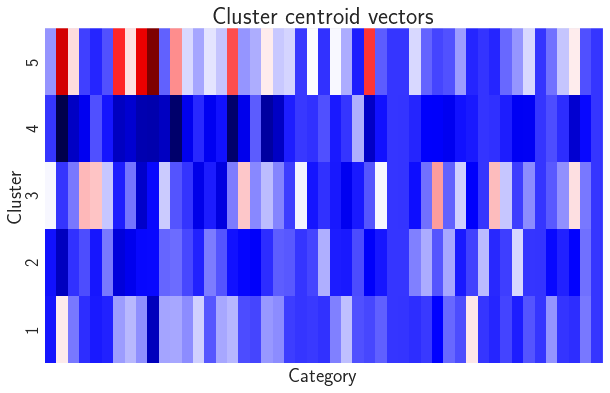

In [114]:
fig=plt.figure()
plt.imshow(cluster_centers, extent=[0,50,0,30], aspect=1, interpolation='None',cmap='seismic')

#plt.tick_params(axis='by', which='major', labelsize=tick_size)
plt.xticks([])
plt.yticks([])
plt.text(-1,3, '1', ha='center', va='center', size=text_size, rotation='90')
plt.text(-1,9, '2', ha='center', va='center', size=text_size, rotation='90')
plt.text(-1,15, '3', ha='center', va='center', size=text_size, rotation='90')
plt.text(-1,21, '4', ha='center', va='center', size=text_size, rotation='90')
plt.text(-1,27, '5', ha='center', va='center', size=text_size, rotation='90')
plt.title('Cluster centroid vectors', size=title_size)
plt.xlabel('Category', size=label_size)
plt.ylabel('Cluster', size=label_size, labelpad=20)


fig.set_size_inches(10,10)
plt.show()

[[ 0.28333891  0.11366418]
 [-0.18955107 -0.09230142]
 [-0.0179342   0.02018504]
 [-0.09683558 -0.01958603]
 [ 0.10494536  0.01924156]]


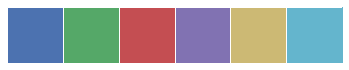

In [52]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

In [53]:
current_palette[0]

(0.2980392156862745, 0.4470588235294118, 0.6901960784313725)

In [54]:
X=np.random.rand(100,50)/2.+.25
print cluster_centers[:,1:3]
print X

[[ 0.60748606  0.59191263]
 [ 0.328625    0.44286418]
 [ 0.50995913  0.53707455]
 [ 0.62075108  0.57828727]
 [ 0.40196348  0.38563411]]
[[ 0.72914102  0.26008587  0.57919565 ...,  0.632701    0.53045527
   0.4183166 ]
 [ 0.70625931  0.40454492  0.29594033 ...,  0.67353676  0.64996749
   0.29387748]
 [ 0.48549757  0.56065685  0.32654827 ...,  0.55205819  0.6268041
   0.53194684]
 ..., 
 [ 0.44435948  0.44174524  0.31602839 ...,  0.67638053  0.73916888
   0.32669325]
 [ 0.5520583   0.30985193  0.26268024 ...,  0.45192709  0.70017093
   0.59496533]
 [ 0.39132579  0.3670235   0.71573252 ...,  0.72319984  0.38719185
   0.64201763]]


In [55]:
predictions=model.predict(X)

In [56]:
print predictions

[1 4 2 2 1 0 1 3 3 3 2 3 1 2 4 4 0 2 2 2 2 2 3 0 3 3 2 4 4 3 2 4 2 3 1 2 3
 2 2 2 4 2 2 2 2 3 4 3 1 4 1 2 2 1 2 4 2 3 0 2 4 3 1 1 3 3 2 2 2 4 2 3 2 2
 3 0 4 0 3 2 2 2 2 3 2 0 2 2 3 3 3 2 4 1 2 2 2 4 2 4]


In [57]:
cmap=cm.jet(np.linspace(0,1,5))

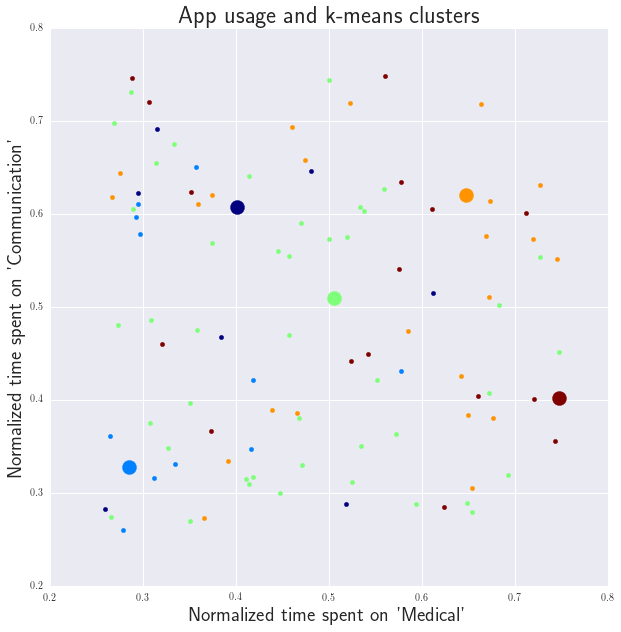

In [60]:
for ii in range(4,5):
    for jj in range(1,2):
        
        dim1=ii
        dim2=jj

        fig=plt.figure()
        for i in range(5):
            x_temp=[]
            y_temp=[]
            for j in range(X.shape[0]):
                if predictions[j]==i:
                    x_temp.append(X[j,dim1])
                    y_temp.append(X[j,dim2])
            
            plt.scatter(x_temp, y_temp, color=cmap[i])
    
            plt.scatter(cluster_centers[i,dim1], cluster_centers[i,dim2], marker='o', s=200, color=cmap[i])
    
        fig.set_size_inches(10,10)
            
        plt.title('App usage and k-means clusters', size=title_size)
        plt.xlabel('Normalized time spent on \'Medical\'', size=label_size)
        plt.ylabel('Normalized time spent on \'Communication\'', size=label_size)
        plt.savefig('./data/plots/kmeans/'+str(ii)+'_'+str(jj))
        plt.show()


In [143]:
print 

100


In [136]:
print predictions

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
